In [20]:
import numpy as np
from matplotlib.pyplot import subplots

In [131]:
S0 = 100
K = 120
std = 0.25
r = 0.07
T = 1
B = 90
npaths = 10000
nt = 1000
dt = T/nt
method = 'milstein'

paths = []
antipaths = []
            
for i in range(npaths):
    S = np.zeros(nt + 1)
    antiS = np.zeros(nt + 1)
    antiS[0] = S0
    S[0] = S0

    for t in range(nt):
        Z = np.random.normal(loc = 0, scale = 1)
        antiZ = -Z
        if method.lower() == 'euler':
            S[t+1] = S[t] + r * S[t] * dt + std * S[t] * np.sqrt(dt) * Z
            antiS[t+1] = antiS[t] + r * antiS[t] * dt + std * antiS[t] * np.sqrt(dt) * antiZ
        if method.lower() == 'milstein':
            # i think the milstein formula in lec notes is incorrect...
            S[t+1] = S[t] + r * S[t] * dt + std * S[t] * (np.sqrt(dt) * Z) + 0.5 * std**2 * ((np.sqrt(dt) * Z)**2 - dt) * S[t]
            antiS[t+1] = antiS[t] + r * antiS[t] * dt + std * antiS[t] * np.sqrt(dt) * antiZ + 0.5 * std**2 * ((np.sqrt(dt) * antiZ)**2 - dt) * antiS[t]
    
    paths.append(S)
    antipaths.append(antiS)    

paths = np.asarray(paths)
antipaths = np.asarray(antipaths)

S_T = paths[:, -1]
antiS_T = antipaths[:, -1]

active = np.zeros(npaths)
antiactive = np.zeros(npaths)

antihit = np.min(antipaths, axis=1) < B
hit = np.min(paths, axis=1) < B

active[hit] = np.maximum(S_T[hit] - K, 0)
antiactive[antihit] = np.maximum(antiS_T[antihit] - K, 0)

price = np.exp(-r * T) * np.mean(np.concatenate([active, antiactive]))
price

0.8629802657229969

IndexError: boolean index did not match indexed array along dimension 0; dimension is 10000 but corresponding boolean dimension is 6129

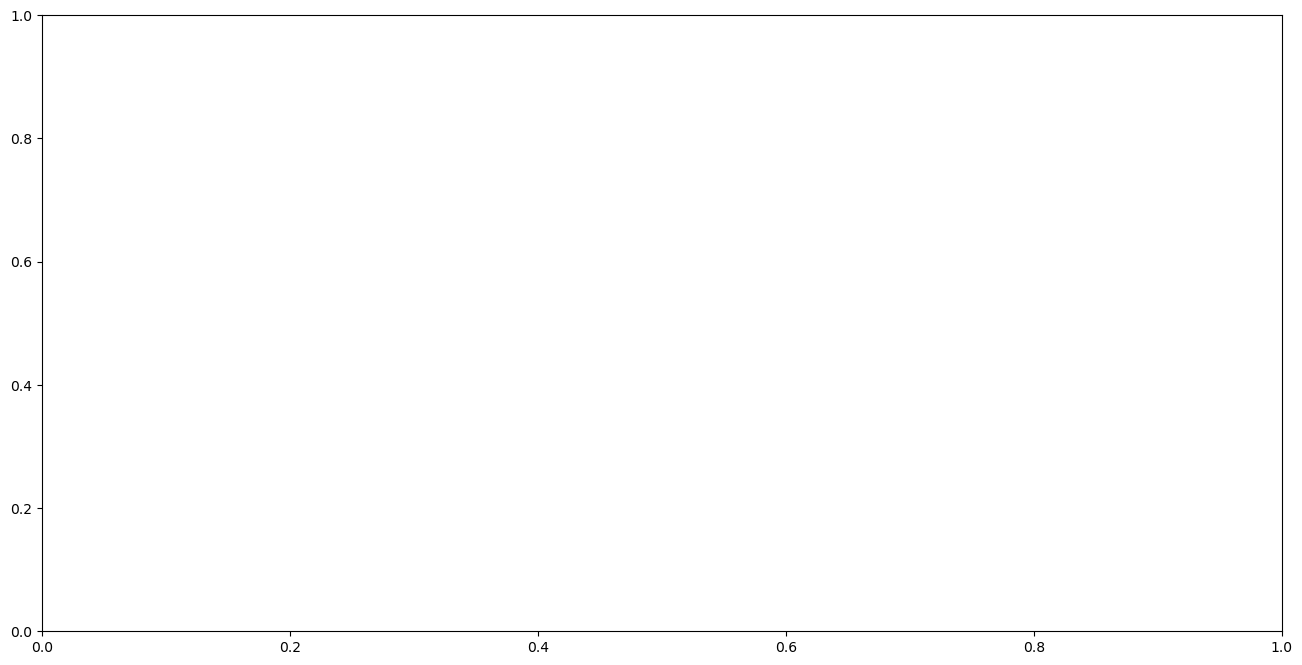

In [141]:
fig, ax = subplots(figsize = (16, 8))
for path in paths[active[hit]>0]:
    ax.plot(path);
for path in antipaths[antiactive[antihit]>0]:
    ax.plot(path);